# CSCI - E25 Computer Vision
# FINAL PROJECT

by Payas Chatrath

# **Fire Protector**: Fire Probability Detection with Computer Vision

**Introduction:**

Wildfires have posed a significant risk to both human life and the environment. Early detection and prompt response have become more crucial for minimizing the damage caused by the fire. According to Copernicus Atmosphere Monitoring Service dataset in [2023 ](https://atmosphere.copernicus.eu/2023-year-intense-global-wildfire-activity), the wildfire emissions is estimated to be 2170 Megatons of carbon. The last recorded emission was in [2022 ](https://atmosphere.copernicus.eu/cams-monitoring-extreme-wildfire-emissions-2022), at 1455 Megatons of carbon.


**Motivation:**
I was drawn to this project because of my work in another class focused on Remote Sensing Data, where I was analysing the impact of wildfires on various
environmental aspects. Through this analysis, I realised how critical it is to detect the fire early and mitigate it to prevent escalating damage. In this project, my aim is to propose a solution by developing a model capable of detecting fires in any given image.

**Summary:**
In my project here, I worked with two different models: **CNN** (Convolutional Neural Network) and **EfficientNetB0** model in order to solve the fire detection problem. I have tried to compare the results towards the end of the experiment.

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import numpy.random as nr
import cv2 as cv
import matplotlib.pyplot as plt
import keras
from keras import callbacks
import tensorflow as tf
import keras.utils as ku
import tensorflow_datasets as tfds
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow import expand_dims
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from scipy.stats import rankdata
import skimage
from skimage import data
from skimage.filters.rank import equalize
import skimage.filters as skfilters
import skimage.morphology as morphology
import skimage.transform as transform
from skimage.color import rgb2gray, rgb2xyz
from skimage import exposure
from skimage.draw import circle_perimeter, polygon_perimeter
from PIL import Image
import numpy as np
import math
from collections import Counter
%matplotlib inline

# Collecting and Preprocessing Data

Here, I am performing multiple functions in order to make the data more easily readable by the model.

Below is the summary of the steps I performed:-

1.   Started of by uploading the [dataset 1](https://www.kaggle.com/datasets/phylake1337/fire-dataset/data) and [dataset 2](https://www.kaggle.com/datasets/mohnishsaiprasad/forest-fire-images) on my google drive and organizing the data in my drive to have one parent folder of data consisting of 2 sub folders of Test and Train data. Both of the 2 sub folders were containing further 2 sub folders as Fire and Non fire. I combined all the fire images into one folder and the non fire images into one folder. Make sure you have same number of images in both Fire and no Fire category to avoid creating a bias.
2.   I start by accessing the data into diffrent lists and performing diffrent manipulations on the data to make a uniform dataset for my model to train and test on.
3.   As I started working with data I found that there are few data types which are unwanted so I implemented a check and remove feature to remove all the unwanted data types such as none type. All the JPG and PNG files are considered for this project.
4.   Towards the end I am combining the lists to make 2 lists one is called images and the other is called labels.





Example of the image size and image from each list can be seen below:-

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


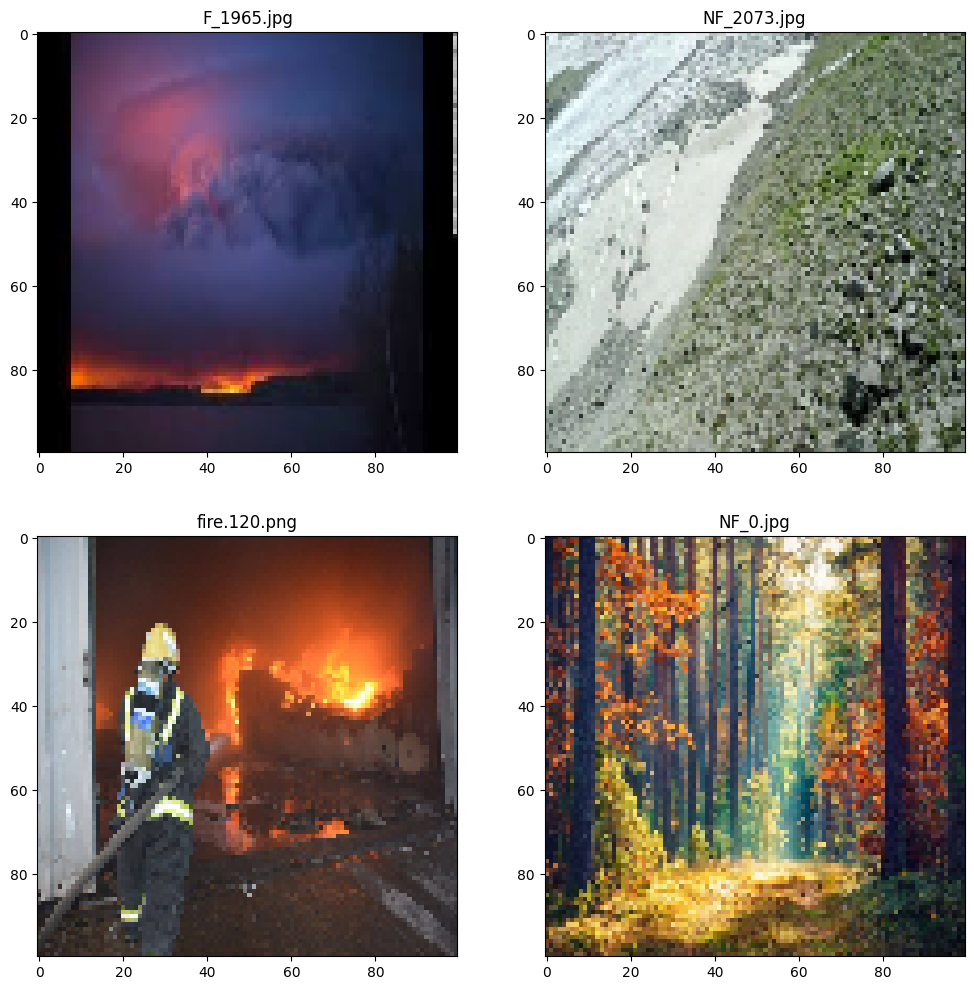

In [ ]:
# Location of the data
train_fire_data_dir =  '/content/drive/MyDrive/Colab Notebooks/Project data/Data/Train_Data/Fire'
train_non_fire_data_dir =  "/content/drive/MyDrive/Colab Notebooks/Project data/Data/Train_Data/Non_Fire"
test_fire_data_dir =  "/content/drive/MyDrive/Colab Notebooks/Project data/Data/Test_Data/Fire"
test_non_fire_data_dir =  "/content/drive/MyDrive/Colab Notebooks/Project data/Data/Test_Data/Non_Fire"

# Initializing some important variables
img_size = 100
fig = plt.figure(figsize=(12,12))
row = 2
col = 2
fire = 1
print("Example of the image size and image from each list can be seen below:-\n")

# Fire Train Data
# Accessing the images in the Fire sub folder of the Train data folder.
# Making sure only the JPG and PNG files are considered and all the none types are removed.
# Resizing the images to ensure uniformity accross the dataset.
Fire_train_list = list()
f_file_name = list()
label_f = list()
for images in os.listdir(train_fire_data_dir):
  if (images.endswith(".png")or images.endswith(".jpg") or images.endswith(".JPG") or images.endswith(".PNG") or images.endswith(".JPEG") ):
    im = cv.imread(os.path.join(train_fire_data_dir,images))
    if type(im) == type(None):
      print(type(im))
      print(images)
      os.remove(os.path.join(train_fire_data_dir,images))
    im = cv.resize(im,(img_size,img_size))
    im = np.array(im)
    label_f.append(1)
    f_file_name.append(images)
    Fire_train_list.append(im)
fig.add_subplot(row, col, 1)
plt.imshow(cv.cvtColor(Fire_train_list[0], cv.COLOR_BGR2RGB))
plt.title(f_file_name[0])
print(str(Fire_train_list[0].shape) )

# Non Fire Train Data
# Accessing the images in the Non Fire sub folder of the Train data folder.
# Making sure only the JPG and PNG files are considered and all the none types are removed.
# Resizing the images to ensure uniformity accross the dataset.
Non_Fire_train_list = list()
nf_file_name = list()
label_nf = list()
for images in os.listdir(train_non_fire_data_dir):
  if (images.endswith(".png")or images.endswith(".jpg") or images.endswith(".JPG") or images.endswith(".PNG") or images.endswith(".JPEG") ):
    im = cv.imread(os.path.join(train_non_fire_data_dir,images))
    if type(im) == type(None):
      print(type(im))
      print(images)
      os.remove(os.path.join(train_non_fire_data_dir,images))
    im = cv.resize(im,(img_size,img_size))
    im = np.array(im)
    label_nf.append(0)
    nf_file_name.append(images)
    Non_Fire_train_list.append(im)
fig.add_subplot(row, col, 2)
plt.imshow(cv.cvtColor(Non_Fire_train_list[0], cv.COLOR_BGR2RGB))
plt.title(nf_file_name[0])
print(str(Non_Fire_train_list[0].shape) )


# Fire Test Data
# Accessing the images in the Fire sub folder of the Test data folder.
# Making sure only the JPG and PNG files are considered and all the none types are removed.
# Resizing the images to ensure uniformity accross the dataset.
Fire_test_list = list()
ft_file_name = list()
label_tf = list()
for images in os.listdir(test_fire_data_dir):
  if (images.endswith(".png")or images.endswith(".jpg") or images.endswith(".JPG") or images.endswith(".PNG") or images.endswith(".JPEG") ):
    im = cv.imread(os.path.join(test_fire_data_dir,images))
    if type(im) == type(None):
      print(type(im))
      print(images)
      os.remove(os.path.join(test_fire_data_dir,images))
    im = cv.resize(im,(img_size,img_size))
    im = np.array(im)
    label_tf.append(1)
    ft_file_name.append(images)
    Fire_test_list.append(im)
fig.add_subplot(row, col, 3)
plt.imshow(cv.cvtColor(Fire_test_list[0], cv.COLOR_BGR2RGB))
plt.title(ft_file_name[0])
print(str(Fire_test_list[0].shape) )


# Non Fire Test Data
# Accessing the images in the Non Fire sub folder of the Test data folder.
# Making sure only the JPG and PNG files are considered and all the none types are removed.
# Resizing the images to ensure uniformity accross the dataset.
Non_Fire_test_list = list()
nft_file_name = list()
label_tnf = list()
for images in os.listdir(test_non_fire_data_dir):
  if (images.endswith(".png")or images.endswith(".jpg") or images.endswith(".JPG") or images.endswith(".PNG") or images.endswith(".JPEG") ):
    im = cv.imread(os.path.join(test_non_fire_data_dir,images))
    if type(im) == type(None):
      print(type(im))
      print(images)
      os.remove(os.path.join(test_non_fire_data_dir,images))
    im = cv.resize(im,(img_size,img_size))
    im = np.array(im)
    label_tnf.append(0)
    nft_file_name.append(images)
    Non_Fire_test_list.append(im)
fig.add_subplot(row, col, 4)
plt.imshow(cv.cvtColor(Non_Fire_test_list[0], cv.COLOR_BGR2RGB))
plt.title(nft_file_name[0])
print(str(Non_Fire_test_list[0].shape) )


# Combining the lists to generate 4 lists 2 for training data(Images and labels)
# 2 for testing data(Images and labels). ALso making sure the labels list
# display Fire or No Fire label in them.
train_images = Fire_train_list + Non_Fire_train_list
train_label = label_f + label_nf
test_images = Fire_test_list + Non_Fire_test_list
test_label = label_tf + label_tnf
replace = lambda f: "Fire" if f == fire else "No Fire"
test_label = list(map(replace,test_label))
train_label = list(map(replace,train_label))

# Over multiple tests I realized having two lists of images and labels is better and
# less complicated so I added all of them for simplicity. I also kept the lists
# I have generated earlier for the ease of keping track of the amount of image
# in each category.
images = train_images + test_images
labels = train_label + test_label


Checking the number of images present in the dataset to make sure no bias is generated in the model.

In [ ]:
print("Number of Non fire images in the data: ",len(Non_Fire_train_list)+len(Non_Fire_test_list))
print("Number of fire images in the data: ",len(Fire_train_list)+len(Fire_test_list))

Number of Non fire images in the data:  2767
Number of fire images in the data:  2767


# Scaling
In the block of code given below, I am converting the pixel values to be in between 0 and 1. I am also converting the list of images and labels to numpy n dimensional arrays for the ease of conversion to tensors in order for the model to understand.

In [ ]:
img_arr = np.array(images)
label_arr = np.array(labels)
img_arr = (img_arr/255)
print(img_arr.shape)
print(label_arr.shape)

(5534, 100, 100, 3)
(5534,)


# Spliting the data into Test and Train

Random Spliting here is set to 42 in order to ensure the spliting of the data is the same everytime the code is executed. This is purely done for experimental purposes and to record results.

I chose to use 70% of the data for training and 30% of the data for testing and below I have printed the amount of images in each dataset.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(img_arr,label_arr,test_size=0.3,random_state=42)
print("Number of images in training data: ",len(x_train))
print("Number of labels in training data: ",len(y_train))
print("\n")
print("Number of images in test data: ",len(x_test))
print("Number of labels in test data: ",len(y_test))
print("\n")
occur_train = Counter(y_train)
occur_test = Counter(y_test)
print("Number of fire images in training data: ",occur_train['Fire'])
print("Number of no fire images in training data: ",occur_train['No Fire'])
print("\n")
print("Number of fire images in test data: ",occur_test['Fire'])
print("Number of no fire images in test data: ",occur_test['No Fire'])

Number of images in training data:  3873
Number of labels in training data:  3873


Number of images in test data:  1661
Number of labels in test data:  1661


Number of fire images in training data:  1913
Number of no fire images in training data:  1960


Number of fire images in test data:  854
Number of no fire images in test data:  807


In [ ]:
# Creating a list of arrays and performing one hot encoding manually.
# Setting Fire = 1.0 and No Fire = 0.0
x_train = list(x_train)
y_train = list(y_train)
x_test = list(x_test)
y_test = list(y_test)
replace = lambda f: 1.0 if f == "Fire" else 0.0
y_train = list(map(replace,y_train))
y_test = list(map(replace,y_test))

# Converting to tensor for model
train = tf.convert_to_tensor(x_train, dtype = tf.float32)
train_l = tf.convert_to_tensor(y_train, dtype=tf.float32)
test = tf.convert_to_tensor(x_test, dtype = tf.float32)
test_l = tf.convert_to_tensor(y_test,dtype=tf.float32)


# Useful Functions

Some useful functions to handle the repeating tasks in the project.

In [ ]:
# The following fuction is derived from one of our labs it help with plotting the
# graph of loss VS epochs of the model.
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.show()

# The following fuction is derived from one of our labs it help with plotting the
# graph of accuracy VS epochs of the model.
def plot_accuracy(history):
    x = list(range(1, len(history.history['accuracy']) + 1))
    plt.plot(x, history.history['accuracy'], color = 'red', label = 'Test accuracy')
    plt.plot(x, history.history['val_accuracy'], label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.show()

# The following function helps with running the model on a user selected image
# It requires the model we want to run and input image path. This also performes
# the necessary pre-processing techniques on the image.
def predict_model(model, img_path):
  img_size=100
  img = cv.imread(img_path)
  if type(img) == type(None):
        print("Please input a JPG or PNG file for the model to make prediction")
  im = cv.resize(img,(img_size,img_size))
  im = np.array(im)
  im_list = list()
  im_list.append(im)
  im = tf.convert_to_tensor(im_list, dtype = tf.float32)
  im = im/255.0
  pred = model.predict(im)
  pred_type = "Fire" if pred[0][0] > 0.51 else "No Fire"
  fig.add_subplot(1, 1, 1)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title("Prediction is: "+pred_type)
  print("The probability of fire in the image is"+" "+str(round(pred[0][0]*100,2))+"%")


# Below function helps with providing the evaluation of the model it provides
# a confusion matrix and average Precision and Recall score. This function is derived from our labs
# but it is modified to the needs of the project.
def evaluate_model(model, test_imges, test_labels):
    ## Compute class predictions here I decided if the probability of fire is higher than
    # 51% then I will classify the image as fire.
    class_probabilities = model.predict(test_imges)
    i = 0
    for pred in class_probabilities:
      if pred[0] > 0.51:
        class_probabilities[i] = 1
      else:
        class_probabilities[i] = 0
      i = i +1
    class_predictions = class_probabilities

    ## Get the class labels, counts and compute the class-specific recall and precision.
    test_labels_vector = test_labels
    unique_labels, label_counts = np.unique(test_labels_vector, return_counts=True)
    class_precision = metrics.precision_score(test_labels_vector, class_predictions, labels=unique_labels, average=None)
    class_recall = metrics.recall_score(test_labels_vector, class_predictions, labels=unique_labels, average=None)

    ## Comptue and print the mean average precision and recall accounting for class frequency weights
    sum_label_counts = np.sum(label_counts)
    weighted_average = lambda x: round(np.sum(np.divide(x * label_counts, sum_label_counts)), 4)
    print('Average precision = ' + str(weighted_average(class_precision)))
    print('Average recall = ' + str(weighted_average(class_recall)))

    ## Compute, display and plot the confusion matrix.
    confusion_matrix = metrics.confusion_matrix(test_labels_vector, class_predictions)
    print('\nConfusion matrix')
    print('\n No Fire | Fire')
    print(pd.DataFrame(confusion_matrix))
    p = plt.imshow(np.log(np.divide(confusion_matrix + 1.0, np.sum(confusion_matrix, axis=1))))
    plt.title("\nNo Fire                   Fire")
    cb = plt.colorbar(p)
    _=cb.set_label('Log count')



# Convolution Neural Network Model Development

Below are few things, I observed while experiemented with different aspects of the model :-

**Max Pooling/layers:** I experimented with different architectures of the CNN and found that the more pooling I did the smoother the curve on loss and Accuracy plots was.

**Data Augmentation:** I experimented with different factor of rotations and found that the best results were derived from a factor of 0.15 across different parameters of the model. Due to time constrain I could not experiment with Random Translation/flip much but I did see an increase in accuracy when I incorporated it in the model. I experimented with added the data augmentation layer after every drop out layer in the model and saw a huge increase in the irregularities of the graph so decided to cut it down to only one layer which made the graph smoother.

**Activation:** I experimented with softmax, relu and sigmoid functions and saw that with softmax the model was getting stagnant at 50% accuracy and was not learning more and with sigmoid I saw a similar behaviour as it tends to scale the output between 0 and 1 values. The relu function by far showed the best evidence of learning. When I used all relu functions in all the layers I saw the model got stuck at ~86% learning and did not increase its learning and then I started to experiment further with other functions and saw a potential match with relu and sigmoid function providing the best evidence of model learning.

**Loss:** According to the [keras.loss](https://keras.io/api/losses/probabilistic_losses/) documentation, and my testings with various loss functions, I believe the best loss function would be "binary_crossentropy" for my case here.

**Learning Rate:** With Learning rate I saw as I decreased the rate the accuracy improved and the loss also decreased. I also saw a lot of mis-classifications and irregularities in the graph when I increased the learning rate.

**Weight Decay:** With weight decay I saw huge fluctuations when I increased the weight decay and when I reduced it the error and the accuracy graph both became smoother.

**Optimizers:** I experimented with Adam and RMSprop and found that with Adam the model was fluctuating less in the loss and accuracy curves than with RMSprop.

Note: The optimizer = Adam, Epochs = 80 and batch_size = 100 in below experiment also one observation I have had is that every run the acccuracy differs so you might not achieve the same number but they will be close.

| Final Accuracy  | Dropout  | weight decay | Learning Rate | Observation notes on loss|   
| --------------- | -------- | ------------ | ------------- | ------------- |
|0.9494        | 0.2      | 0.00001         | 0.001     | A lot of irregularities as the curve decreases this ran for 53 epochs
| 0.9474         | 0.2      | 0.00         | 0.001        | Loss curve is under the training loss but there is still irregularities.
| 0.9458          | 0.2      | 0.0001         | 0.001        | Irregularities are present in the loss curve & accuracy curve shows model is learning but I feel like the curve can be made smoother.Ran for 20 epochs
|0.9456|0.3|0.0001|0.002| A lot of irregularities in a decreasing line this ran for 40 epochs.
|0.9447        | 0.3      | 0.001         | 0.001     | A lot of irregularities but does show a learning curve and ran for 20 epochs.
|0.9442|0.3|0.0001|0.001| A lot of irregularities in a decreasing line this ran for only 27 epochs.
|0.9440|0.4|0.001|0.001| A lot of irregularities with no learning curve ran for 49 epochs.
| 0.9435          | 0.2      | 0.1         | 0.001        | Overfitting model a lot more irregularities in the test loss and does not show sign of learning.
| 0.9426          | 0.2      | 0.001         | 0.001        | A smoother curve on the test and training. Ran for 25 epochs.
| 0.9354         | 0.2      | 0.001         | 0.0001        | Curve shows good learning with less irregularities are present this ran for 65 epochs.
|0.9343        | 0.3      | 0.001         | 0.002     | a lot of Irregularity in the training loss curve and it ran for 18 epochs.
|0.9343        | 0.5      | 0.001         | 0.001     | Irregularities with a small curve more straight line showcasing less learning this ran for 28 epochs.
| 0.9334         | 0.2      | 0.001         | 0.002        | Overfitting as the loss graph is not smooth and almost in straight line
| 0.9228        | 0.3      | 0.0001         | 0.0001        | The curve in this model is having too many irregularities in both the graphs.
|0.9225        | 0.5      | 0.001         | 0.002     | overfitting model with irregularities but a little more visible curve decreasing loss.
| 0.9185         | 0.5      | 0.003         | 0.002        | ran for 13 epochs does not look like its learning anything the curve looks smooth but it could be because of less epochs.
| 0.9169         | 0.2      | 0.0001         | 0.0001        | The curve in this model is smoother and with less irregularities in both the graphs.
| 0.9151         | 0.5      | 0.004         | 0.003        | Overfitting model no learning curve present in both test and training loss & accuracy.
|0.9135|0.5|0.000004|0.00003| This shows the smoothest curve but it ran for 80 epochs so it might be there are a lot of irregularities they just got hidden because of a lot of epochs also the training curve stops to learn right around 30 epochs.
| 0.9047         | 0.2      | 0.00001         | 0.00001        | Very smooth graph ran for 80 epochs accuracy maximum achieved was ~90%







In [ ]:
# Initializing variables for ease of experimenting
dropout = 0.2

#Convolutional Neural Network
model = models.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.Conv2D(128,(3,3), activation = 'relu', input_shape = (img_size,img_size,3)),
    layers.MaxPooling2D((2,2)),
    Dropout(dropout),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(dropout),
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(dropout),
    layers.Flatten(),
    layers.Dense(16, activation = 'sigmoid'),
    Dropout(dropout),
    layers.Dense(1, activation='sigmoid')
])

# Compiling model
model.compile(optimizer=Adam(learning_rate=0.0001, weight_decay=0.001), loss='binary_crossentropy' ,metrics=['accuracy'])


# Training the Model

Here I chose to use **callbacks** in order to implement early stopping of the model. Here, I used the patience level of 5. If we experience a lower accuracy for 5 steps, then we will stop training the model. Further, this will help with ensuring that the resources are not just simply over used resulting with early convergence. Following are the key factors I manipulated for experimentations :-

**Batch size** of 100 corresponding to a 39 batches of data in 0.3 test size is used to train the model as that worked the best for me accross different experiements.

**Epochs** I experimented with many different epochs but keeping the dataset size in mind I chose to not train the model for too long as it would start to overfit. I implemented the callbacks which helped with converging the model at its optimal performance. This gave me the leverage to put a higher number of epochs 80 to which if a model runs for that long its probably not learning as quickly or taking a longer time to learn.

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Project data/final_project_model.hdf5' # define where the model is saved
callbacks_list = [
        callbacks.EarlyStopping(
            monitor = 'val_loss', # Use accuracy to monitor the model
            patience = 5 # Stop after patience steps with lower accuracy
        ),
        callbacks.ModelCheckpoint(
            filepath = filepath, # file where the checkpoint is saved
            monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
            save_best_only = True # Only save model if it is the best
        )
]

# Training the model with different hyperparameters
train_mod = model.fit(train,train_l, epochs = 80, batch_size= 100,
                  validation_data =(test,test_l), callbacks = callbacks_list)


Epoch 1/80
39/39 [==============================] - 7s 122ms/step - loss: 0.6875 - accuracy: 0.5745 - val_loss: 0.6108 - val_accuracy: 0.6930
Epoch 2/80
39/39 [==============================] - 4s 102ms/step - loss: 0.5382 - accuracy: 0.7640 - val_loss: 0.4304 - val_accuracy: 0.8603
Epoch 3/80
39/39 [==============================] - 4s 103ms/step - loss: 0.3876 - accuracy: 0.8526 - val_loss: 0.3270 - val_accuracy: 0.8898
Epoch 4/80
39/39 [==============================] - 4s 103ms/step - loss: 0.3325 - accuracy: 0.8745 - val_loss: 0.3312 - val_accuracy: 0.8802
Epoch 5/80
39/39 [==============================] - 4s 104ms/step - loss: 0.3071 - accuracy: 0.8869 - val_loss: 0.3126 - val_accuracy: 0.8958
Epoch 6/80
39/39 [==============================] - 4s 105ms/step - loss: 0.3050 - accuracy: 0.8890 - val_loss: 0.2968 - val_accuracy: 0.9019
Epoch 7/80
39/39 [==============================] - 4s 105ms/step - loss: 0.2945 - accuracy: 0.8965 - val_loss: 0.2861 - val_accuracy: 0.9019
Epoch 

# Below is the Loss VS Epoch and Accuracy VS Epoch Graphs of the Model

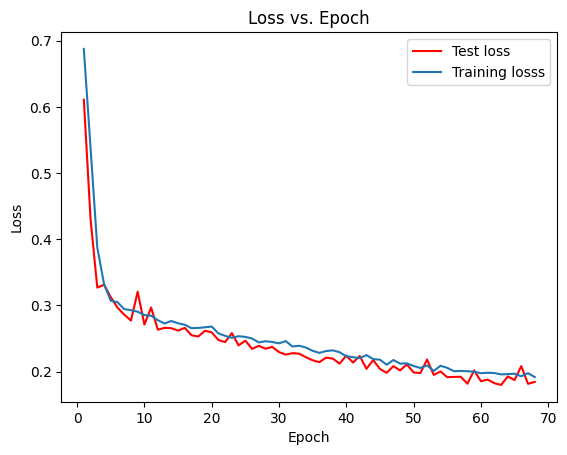

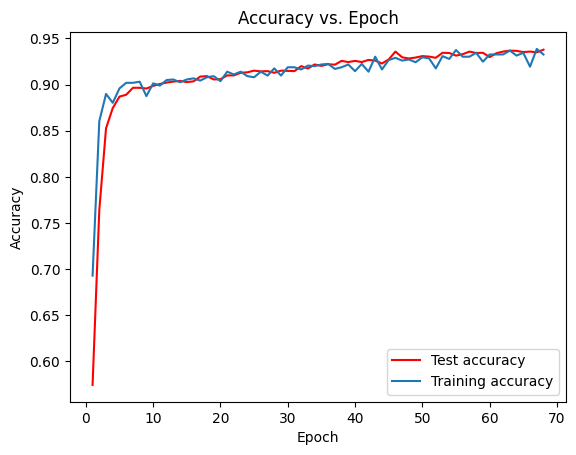

In [ ]:
plot_loss(train_mod)
plot_accuracy(train_mod)

# Evaluating the Performance of Model

I used Confusion Matrix to check the performance of my model. The target was to have the diagonals from top left to bottom right, to have the most amount of classifications. These generally signify that predictions are correctly classified.

52/52 [==============================] - 1s 11ms/step
Average precision = 0.9336
Average recall = 0.932

Confusion matrix

 No Fire | Fire
     0    1
0  775   32
1   81  773


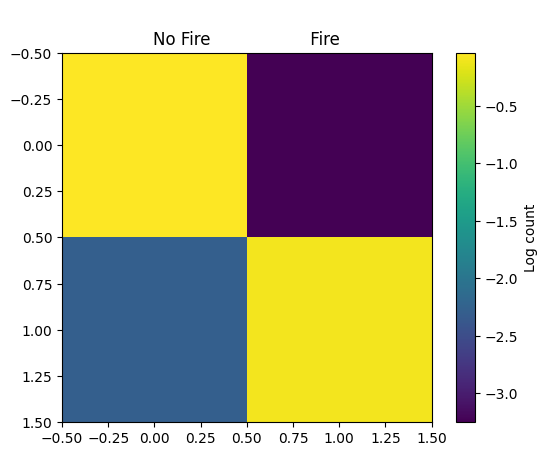

In [ ]:
evaluate_model(model, test, test_l)

# Testing Model

In this section of the project I am testing the model with random images I found online, none of the images I am testing in this section have been a part of the Test or Training data set.

1/1 [==============================] - 0s 253ms/step
The probability of fire in the image is 98.22%


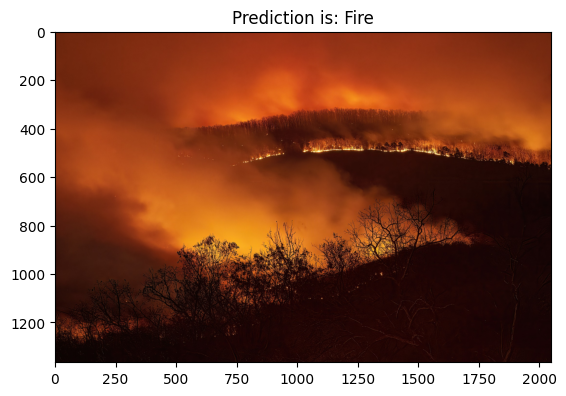

In [ ]:
predict_model(model, '/content/drive/MyDrive/Colab Notebooks/Project data/fire_john_hudson.jpg')

1/1 [==============================] - 0s 19ms/step
The probability of fire in the image is 41.93%


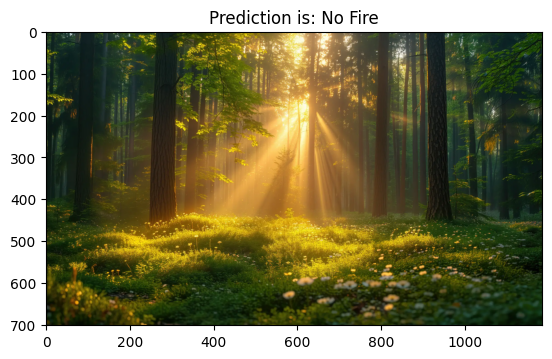

In [ ]:
predict_model(model, '/content/drive/MyDrive/Colab Notebooks/Project data/magical_tweety.png')

# Inference
During my random testing of the model, I encountered several intriguing cases. When I input images of fire trucks or firefighters, the model frequently misinterpreted them as containing fire. This observation makes me think if I should consider augmenting the dataset with the images of fire trucks and firefighters without the fire in the image. I believe the ~6% of loss in the accuracy might be because of this reason as the model seems to think of fire trucks and fire fighters as a part of fire.

Another reason, I believe that might have affected the model accuracy could be the imbalance of the images in the training and test data which was randomly splitted.

Below is my test with a fire truck and Firefighter.

1/1 [==============================] - 0s 18ms/step
The probability of fire in the image is 92.25%


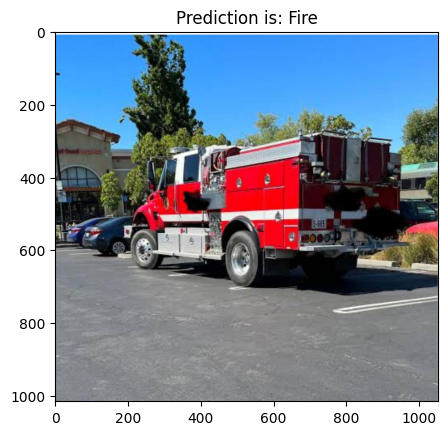

In [ ]:
predict_model(model, '/content/drive/MyDrive/Colab Notebooks/Project data/WhatsApp Image 2024-05-03 at 9.02.11 PM.jpeg')

1/1 [==============================] - 0s 19ms/step
The probability of fire in the image is 63.46%


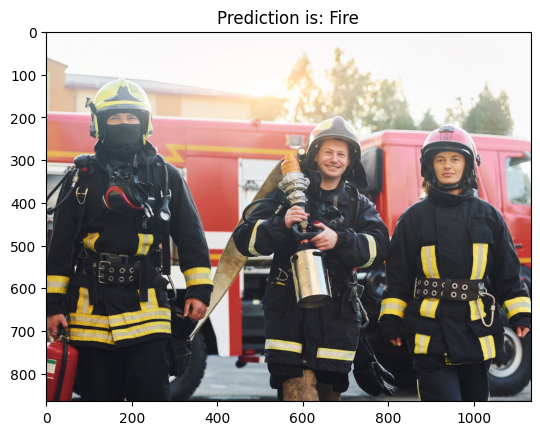

In [ ]:
predict_model(model, '/content/drive/MyDrive/Colab Notebooks/Project data/fire_men.jpg')

# Below is the Performance of Transfer learning with Efficient Net B0 model:-

Below is the summary of the training process of my experiment with EfficientNetB0.

**Optimizer:** Here when I used Adam the learning was not very evident. When I tested with RMSprop I saw a better learning graph than Adam. So for EfficientNetB0 model I decided to use the RMSprop optimizer.

| Final Accuracy  | Dropout  | weight decay | Learning Rate | Observation notes on loss|    
| --------------- | -------- | ------------ | ------------- | ------------- |
| 0.7341        | 0.2      | 0.001         | 0.001        | A lot of irregularity with some learning taking place.
| 0.7124          | 0.2      | 0.0001         | 0.001     |   Looks like the model is overfitting as it has a lot of irregularities.
| 0. 5856       | 0.2      | 0.001         | 0.0001        |We still have irregularities in the curves very irradic ones in the training curve of the model but it does feel like the model is learning a slowly.
| 0.6610          | 0.2      | 0.0001         | 0.0001  | Overfitting ran for 6 epochs.
| 0.6096        | 0.2      | 0.00001         | 0.00001   | We can see a curve but it looks like the accuracy is increasing over epochs shows that the model is actually learning.      




In [ ]:
# The below function is derived from the homework solutions and is modified in order to
# understand the data here. This functions helps in building an EfficientNetBo model
# with pre-trained weights.
def build_model(num_classes):
    inputs = layers.Input(shape=(100, 100, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="sigmoid", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.RMSprop(learning_rate=0.00001, weight_decay=0.00001)
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

# This function is derived from homework solutions but has been modified to fit
# the needs of the experiment. In this function we are trying to unfreeze the top 20
# layers.
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = keras.optimizers.RMSprop(learning_rate=0.00001, weight_decay=0.00001)
    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

trained_ef_model = build_model(num_classes=1)
trained_ef_model = unfreeze_model(trained_ef_model)


trained_ef_hist = trained_ef_model.fit(train,train_l, epochs=80, batch_size= 100, validation_data=(test,test_l), callbacks = callbacks_list)

16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/80
39/39 [==============================] - 15s 171ms/step - loss: 0.7291 - accuracy: 0.4957 - val_loss: 0.7252 - val_accuracy: 0.5141
Epoch 2/80
39/39 [==============================] - 3s 70ms/step - loss: 0.7154 - accuracy: 0.5056 - val_loss: 0.7099 - val_accuracy: 0.5141
Epoch 3/80
39/39 [==============================] - 3s 70ms/step - loss: 0.7081 - accuracy: 0.5190 - val_loss: 0.7020 - val_accuracy: 0.5141
Epoch 4/80
39/39 [==============================] - 3s 70ms/step - loss: 0.7095 - accuracy: 0.5092 - val_loss: 0.6959 - val_accuracy: 0.5141
Epoch 5/80
39/39 [==============================] - 3s 70ms/step - loss: 0.7109 - accuracy: 0.5164 - val_loss: 0.6928 - val_accuracy: 0.5141
Epoch 6/80
39/39 [==============================] - 3s 72ms/step - loss: 0.7052 - accuracy: 0.5241 - val_loss: 0.6916 - val_accuracy: 0.5141
Epoch 7/80
39/39 [==============================] - 3s 71ms/step - loss: 0.7092 - accur

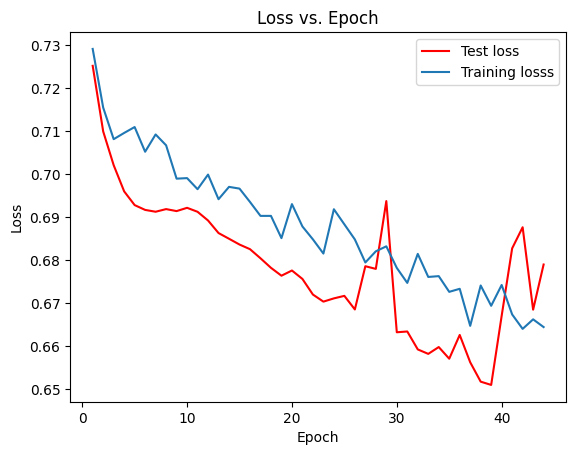

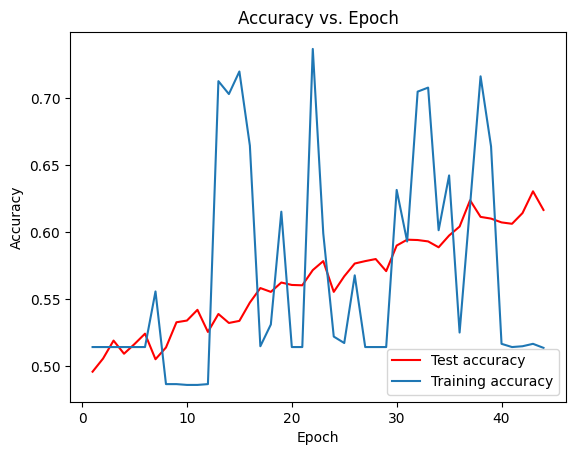

In [ ]:
plot_loss(trained_ef_hist)
plot_accuracy(trained_ef_hist)

52/52 [==============================] - 4s 36ms/step
Average precision = 0.5073
Average recall = 0.5141

Confusion matrix

 No Fire | Fire
   0    1
0  2  805
1  2  852


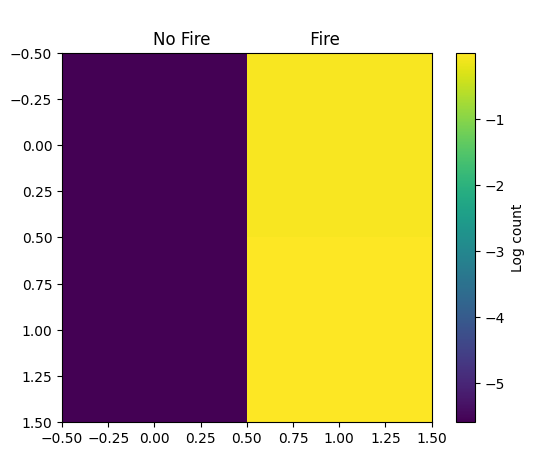

In [ ]:
evaluate_model(trained_ef_model, test, test_l)

1/1 [==============================] - 1s 864ms/step
The probability of fire in the image is 68.17%


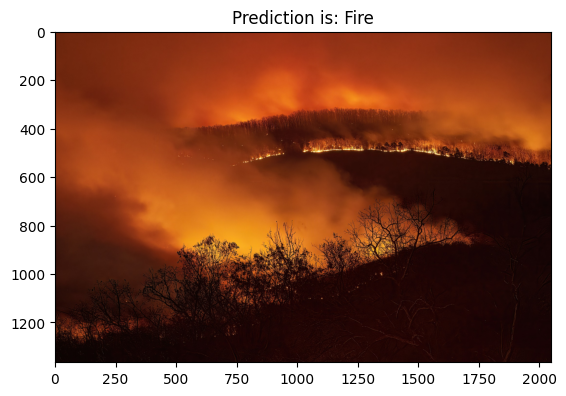

In [ ]:
predict_model(trained_ef_model, '/content/drive/MyDrive/Colab Notebooks/Project data/fire_john_hudson.jpg')

1/1 [==============================] - 0s 33ms/step
The probability of fire in the image is 65.94%


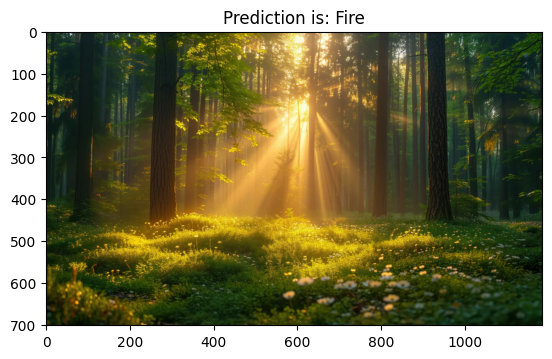

In [ ]:
predict_model(trained_ef_model, '/content/drive/MyDrive/Colab Notebooks/Project data/magical_tweety.png')

1/1 [==============================] - 0s 25ms/step
The probability of fire in the image is 57.36%


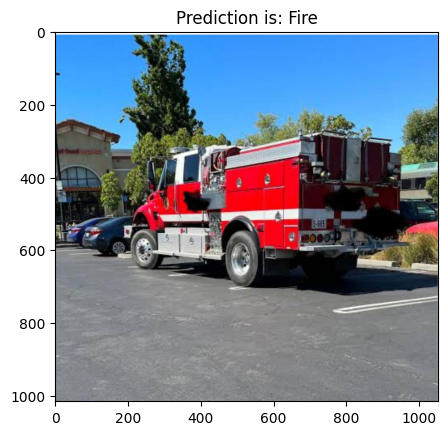

In [ ]:
predict_model(trained_ef_model, '/content/drive/MyDrive/Colab Notebooks/Project data/WhatsApp Image 2024-05-03 at 9.02.11 PM.jpeg')

1/1 [==============================] - 0s 26ms/step
The probability of fire in the image is 60.71%


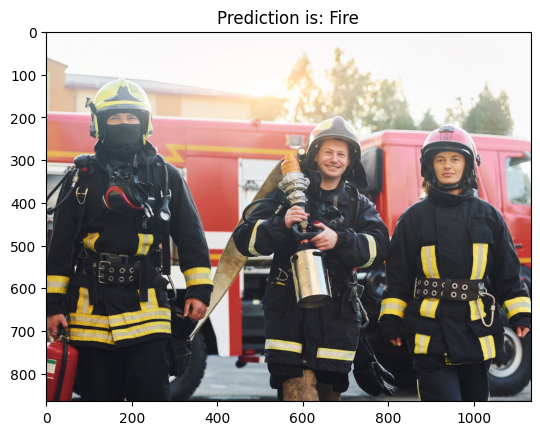

In [ ]:
predict_model(trained_ef_model, '/content/drive/MyDrive/Colab Notebooks/Project data/fire_men.jpg')

# Comparing CNN VS EfficientNetB0 model Performance graphs

EfficientNetB0 Loss Result:-



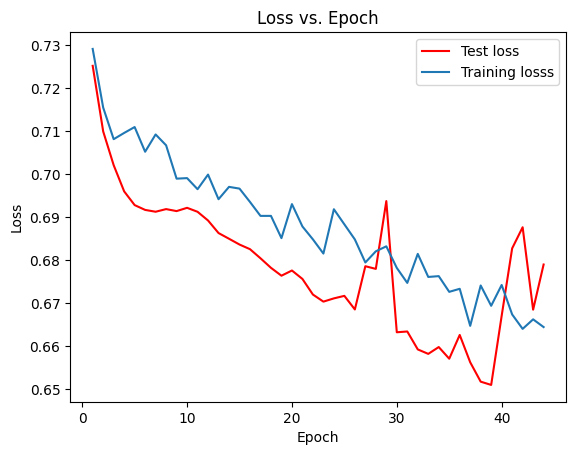

CNN Loss Result:-



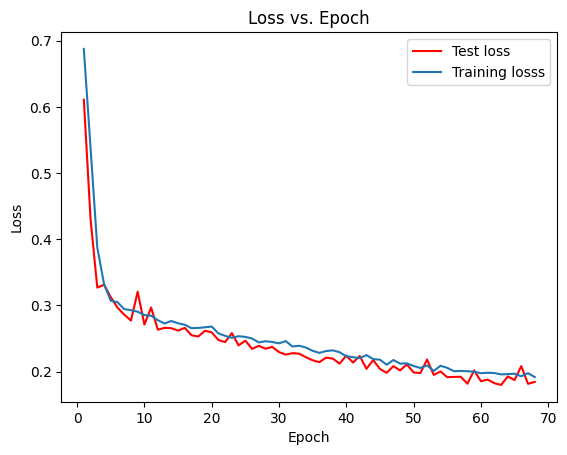

In [ ]:
print("EfficientNetB0 Loss Result:-\n")
plot_loss(trained_ef_hist)
print("CNN Loss Result:-\n")
plot_loss(train_mod)



EfficientNetB0 Accuracy Result:-



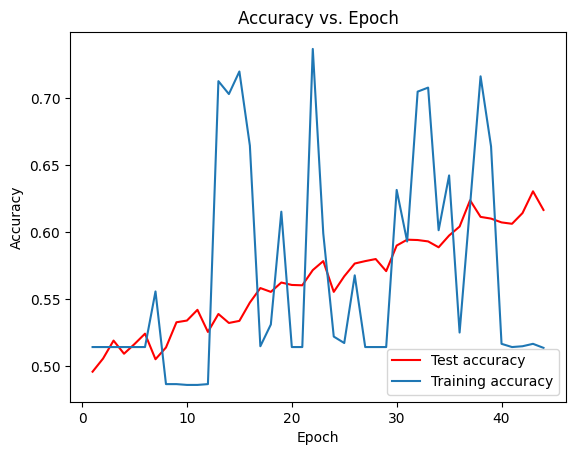

CNN Accuracy Result:-



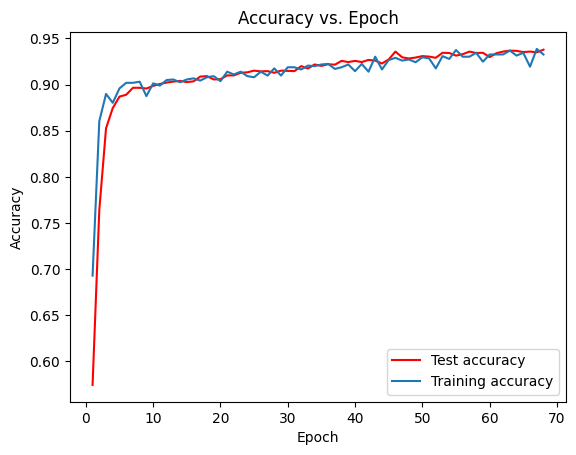

In [ ]:

print("EfficientNetB0 Accuracy Result:-\n")
plot_accuracy(trained_ef_hist)
print("CNN Accuracy Result:-\n")
plot_accuracy(train_mod)

# Conclusion

I'd like to conclude by acknowledging that there are still some aspects of this project that require further refinement. We could definetly work towards increasing the performance of EfficientNetB0 model which could lead to a more meaningful comparison in future. Due to time constraints, my exploration of the EfficientNetB0 model was somewhat limited. However, based on the results, I lean towards favouring the CNN model. It demonstrates better performance and better generalization on the data.  

Suggestions that can be undertaken for the improvisation of the above project are:-


1.   Fine Tuning of EfficientNetB0 model by incorporating data augmentation layer, preprocessing layer and optimizing the hyperparameters.
2.   Extensive Work with video data to train the model in order to understand the survelience level data.
3.   Implementing the re-inforcement(penelizing the model on every wrong prediction resulting in making the model learn) learning to improve the future predictions of the model making it self-sufficient.
4.   Working extensively with the first responders to learn more insights in detecting the fire and implementing them in the model.
5.   Enhancing the dataset to include images of fire trucks/ fire fighters in the non fire images.





